# Loan Prediction Classification

### importing required library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

### Read dataset

In [2]:
dataset=pd.read_csv("C:/Users/reddy/OneDrive/Desktop/pantech/loan.csv")

In [3]:
dataset.style.set_properties(**{'background-color':'cyan','font-family':'cursive','color':'black'})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.000000,360.000000,1.000000,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.000000,360.000000,1.000000,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.000000,360.000000,0.000000,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.000000,360.000000,1.000000,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.000000,360.000000,1.000000,Semiurban,N


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


###  checking Null values

In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###  Droping Null Values

In [6]:
dataset=dataset.dropna()

In [7]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###  Visualization

<AxesSubplot:>

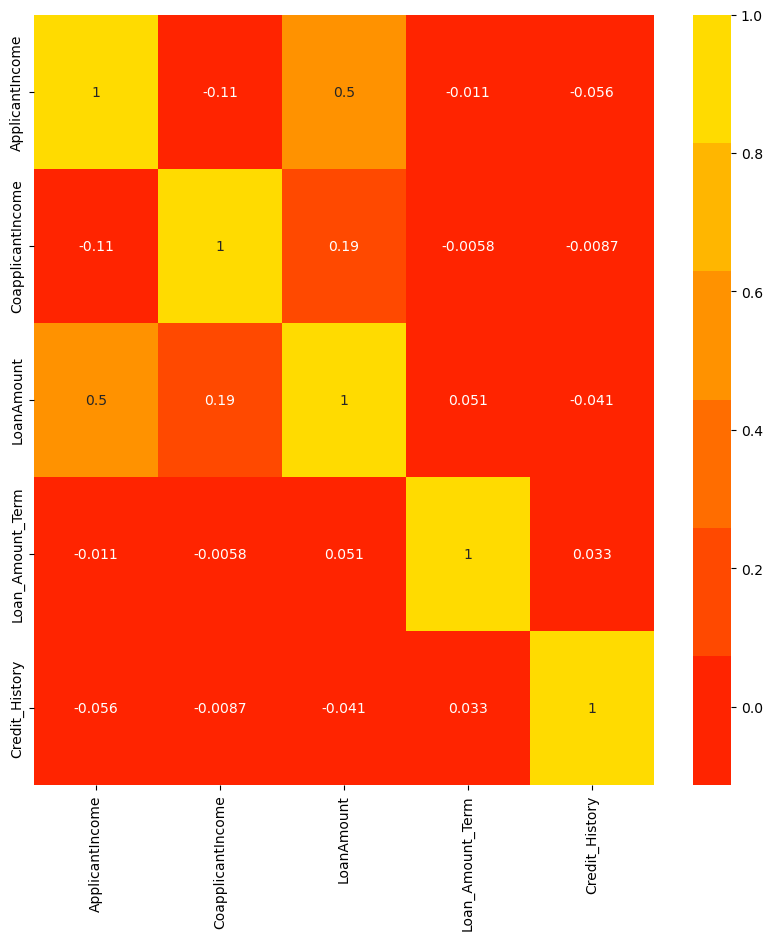

In [8]:
plt.figure(figsize=(10,10))
colormap = sns.color_palette("autumn")
sns.heatmap(dataset.corr(),annot=True,cmap=colormap)

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

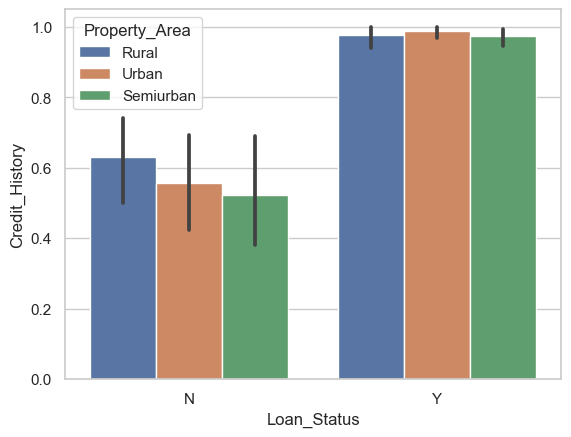

In [9]:
sns.set(style="whitegrid")
sns.barplot(y='Credit_History',x='Loan_Status',hue='Property_Area',data=dataset)

### Repalcing string to binary values

In [10]:
dataset.replace({'Male':1,'Female':0,'Yes':1,'No':0,'Graduate':1,'Not Graduate':0,'Rural':0,'Urban':1,'Semiurban':2,'Y':1,'N':0,'3+':4},inplace=True)

In [11]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [12]:
x=dataset.iloc[:,1:12]
y=dataset['Loan_Status']

In [13]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [14]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

### Spliting Dataset 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=4)

In [17]:
x_test.shape,y_test.shape,x_train.shape,y_train.shape

((120, 11), (120,), (360, 11), (360,))

### Support Vector Machine

In [18]:
from sklearn.svm import SVC

In [19]:
model1=SVC(kernel='linear',C=1.0)

### Traning Model

In [20]:
svm=model1.fit(x_train,y_train)

In [21]:
y1_pred=model1.predict(x_test)

### Prediction Values

In [22]:
y1_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

### Accuarcy Score

In [24]:
accuracy1=accuracy_score(y_test,y1_pred)
print("accuracy score of svm:",accuracy1)

accuracy score of svm: 0.6833333333333333


In [25]:
print('confusion matrix of svm:',confusion_matrix(y_test,y1_pred))

confusion matrix of svm: [[12 31]
 [ 7 70]]


In [26]:
print('classification report of svm:',classification_report(y_test,y1_pred))

classification report of svm:               precision    recall  f1-score   support

           0       0.63      0.28      0.39        43
           1       0.69      0.91      0.79        77

    accuracy                           0.68       120
   macro avg       0.66      0.59      0.59       120
weighted avg       0.67      0.68      0.64       120



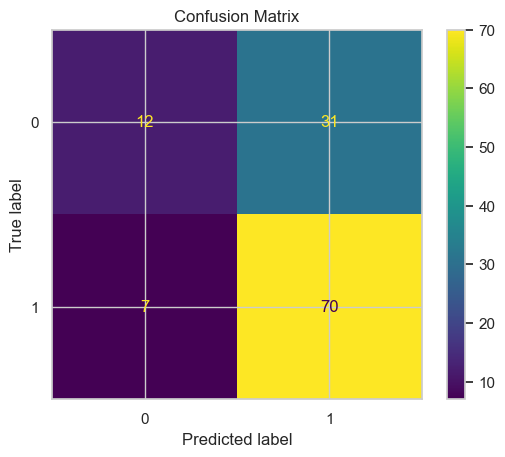

In [27]:
plot_confusion_matrix(model1, x_test, y_test);
plt.title('Confusion Matrix');

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model2=LogisticRegression()

In [30]:
lr=model2.fit(x_train,y_train)

In [31]:
y2_pred=model2.predict(x_test)

In [32]:
y2_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
accuracy2=accuracy_score(y_test,y2_pred)
print("accuracy score of LogisticRegression:",accuracy2)

accuracy score of LogisticRegression: 0.7166666666666667


In [34]:
print('confusion matrix of LogisticRegression:',confusion_matrix(y_test,y2_pred))

confusion matrix of LogisticRegression: [[14 29]
 [ 5 72]]


In [35]:
print('classification report of LogisticRegression:',classification_report(y_test,y2_pred))

classification report of LogisticRegression:               precision    recall  f1-score   support

           0       0.74      0.33      0.45        43
           1       0.71      0.94      0.81        77

    accuracy                           0.72       120
   macro avg       0.72      0.63      0.63       120
weighted avg       0.72      0.72      0.68       120



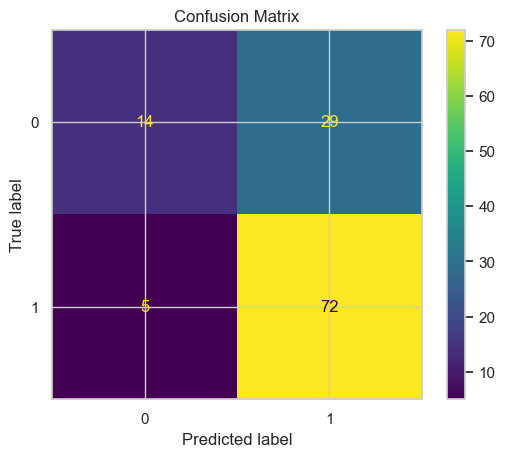

In [36]:
plot_confusion_matrix(model2, x_test, y_test);
plt.title('Confusion Matrix');

### Difference between svm and logistic Regression

In [37]:
x_label=['svm','Logistic Regression']
y_label=[accuracy1,accuracy2]

<AxesSubplot:>

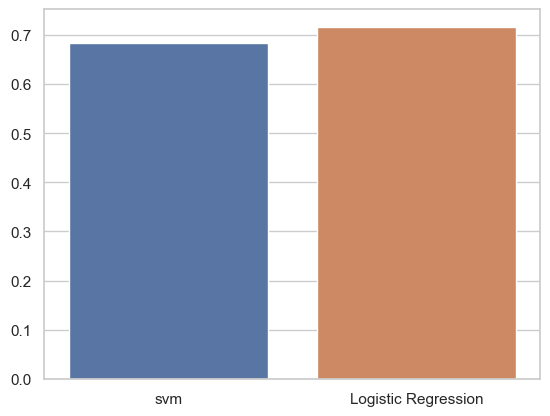

In [38]:
sns.barplot(x=x_label,y=y_label)